In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading Data and some feature Engineering and EDA
Loading all the training data

In [4]:
dtypes = {
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [5]:
temp = pd.read_csv('train.csv.zip', nrows=2)

In [6]:
columns = temp.columns.tolist()

In [7]:
columns.remove('MachineIdentifier')

In [8]:
train = pd.read_csv('train.csv.zip', usecols=columns, dtype=dtypes)

In [9]:
train.shape

(8921483, 82)

In [10]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

### Taking charge Null value columns in the data set.
1) Check for null values all over the data frame and drop columns with high null values.


In [11]:
null_cols = train.isnull().sum().sort_index()*100/len(train)
display_all(null_cols)

AVProductStatesIdentifier                             0.405998
AVProductsEnabled                                     0.405998
AVProductsInstalled                                   0.405998
AppVersion                                            0.000000
AutoSampleOptIn                                       0.000000
AvSigVersion                                          0.000000
Census_ActivationChannel                              0.000000
Census_ChassisTypeName                                0.006983
Census_DeviceFamily                                   0.000000
Census_FirmwareManufacturerIdentifier                 2.054109
Census_FirmwareVersionIdentifier                      1.794915
Census_FlightRing                                     0.000000
Census_GenuineStateName                               0.000000
Census_HasOpticalDiskDrive                            0.000000
Census_InternalBatteryNumberOfCharges                 3.012448
Census_InternalBatteryType                           71

In [12]:
meta_data = pd.DataFrame(index=null_cols.index)
meta_data['null_percent'] = null_cols.values
meta_data['data_type'] = train.dtypes

In [13]:
display_all(meta_data)

,null_percent,data_type
AVProductStatesIdentifier,0.405998,float32
AVProductsEnabled,0.405998,float16
AVProductsInstalled,0.405998,float16
AppVersion,0.000000,category
AutoSampleOptIn,0.000000,int8
AvSigVersion,0.000000,category
Census_ActivationChannel,0.000000,category
Census_ChassisTypeName,0.006983,category
Census_DeviceFamily,0.000000,category
Census_FirmwareManufacturerIdentifier,2.054109,float16


#### Treatment of columns with high no of null values.
Column wise analysis. 
Dropping the following columns for now :- 
1. Census_InternalBatteryType
2. Census_IsFlightingInternal - (Delete for now) we create a third class called 'missing' for the "NaN". Change the data type and perform the operations.
3. Census_ProcessorClass
4. Census_ThresholdOptIn
5. DefaultBrowsersIdentifier
6. OrganizationIdentifier
7. PuaMode
8. SmartScreen
9. Census_IsWIMBootEnabled
10. SMode

[Repeat the same process on the same attributes on the test set too]

In [14]:
train.drop(axis=1, columns=["Census_IsWIMBootEnabled","Census_InternalBatteryType","Census_IsFlightingInternal","Census_ProcessorClass","Census_ThresholdOptIn","DefaultBrowsersIdentifier","OrganizationIdentifier","PuaMode","SmartScreen"], inplace=True)
print (train.shape)

(8921483, 73)


In [15]:
null_cols = train.isnull().sum().sort_index()*100/len(train)
display_all(null_cols)
meta_data = pd.DataFrame(index=null_cols.index)
meta_data['null_percent'] = null_cols.values
meta_data['data_type'] = train.dtypes
display_all(meta_data)

AVProductStatesIdentifier                            0.405998
AVProductsEnabled                                    0.405998
AVProductsInstalled                                  0.405998
AppVersion                                           0.000000
AutoSampleOptIn                                      0.000000
AvSigVersion                                         0.000000
Census_ActivationChannel                             0.000000
Census_ChassisTypeName                               0.006983
Census_DeviceFamily                                  0.000000
Census_FirmwareManufacturerIdentifier                2.054109
Census_FirmwareVersionIdentifier                     1.794915
Census_FlightRing                                    0.000000
Census_GenuineStateName                              0.000000
Census_HasOpticalDiskDrive                           0.000000
Census_InternalBatteryNumberOfCharges                3.012448
Census_InternalPrimaryDiagonalDisplaySizeInInches    0.528320
Census_I

,null_percent,data_type
AVProductStatesIdentifier,0.405998,float32
AVProductsEnabled,0.405998,float16
AVProductsInstalled,0.405998,float16
AppVersion,0.000000,category
AutoSampleOptIn,0.000000,int8
AvSigVersion,0.000000,category
Census_ActivationChannel,0.000000,category
Census_ChassisTypeName,0.006983,category
Census_DeviceFamily,0.000000,category
Census_FirmwareManufacturerIdentifier,2.054109,float16


#### Fixing the missing values in the float columns
1. Wdft_RegionIdentifier [replaced with -10]
2. Wdft_IsGamer [replaced with 2]  
3. UacLuaenable [replaced with -100]
4. RtpStateBitfield [replaced with -100] (has low variance although)
5. OsBuildLab [replaced nas with 'missing' category]
6. IsProtected [replaced with 2] 
7. IeVerIdentifier [replaced with -100]
8. GeoNameIdentifier [replaced with -100]
9. Firewall [replaced with 2] 
10. Census_ProcessorCoreCount [replaced with 4]
11. Census_ProcessorManufacturerIdentifier [replaced with -100]
12. Census_ProcessorModelIdentifier [replaced with -100]
13. CityIdentifier [replaced with -100]
14. Census_TotalPhysicalRAM [replacing with mean  6115.266]
15. Census_SystemVolumeTotalCapacity [replacing with mean  377368.25]
16. Census_PrimaryDiskTypeName [replaced all other with UNKNOWN]
17. Census_PrimaryDiskTotalCapacity [replaced nan with 3089054.5 ]
18. Census_PowerPlatformRoleName [replaced all other with UNKNOWN]
19. Census_OSInstallLanguageIdentifier [replaced with -100]
20. Census_OEMModelIdentifier [replaced with -100]
21. Census_OEMNameIdentifier [replaced with -100]
22. Census_IsVirtualDevice [replaced with 2] 
23. Census_IsFlightsDisabled [replaced with 2] 
24. Census_IsAlwaysOnAlwaysConnectedCapable [replaced with 2] 
25. Census_InternalPrimaryDisplayResolutionVertical --
26. AVProductsInstalled
27. Census_InternalBatteryNumberOfCharges [replaced wiht min 0.0]
28. Census_InternalPrimaryDiagonalDisplaySizeInInches
29. Census_InternalPrimaryDisplayResolutionHorizontal
30. Census_InternalPrimaryDisplayResolutionVertical
  
["Census_ProcessorCoreCount", "Census_ProcessorManufacturerIdentifier", "Census_ProcessorCoreCount", "CityIdentifier", 



In [16]:
display_all(train.Census_ChassisTypeName.value_counts(dropna=False))

Notebook               5248812
Desktop                1872125
Laptop                  685581
Portable                360903
AllinOne                204295
MiniTower                85127
Convertible              84472
Other                    75782
UNKNOWN                  67212
Detachable               51466
LowProfileDesktop        50072
HandHeld                 46009
SpaceSaving              29070
Tablet                   13630
Tower                    12549
Unknown                  10011
MainServerChassis         9545
MiniPC                    4433
LunchBox                  3971
RackMountChassis          3410
SubNotebook                807
BusExpansionChassis        720
NaN                        623
30                         243
StickPC                    142
0                          133
MultisystemChassis          61
Blade                       52
35                          50
PizzaBox                    46
SealedCasePC                39
SubChassis                  16
Expansio

In [17]:
train.Wdft_RegionIdentifier.fillna(-10, inplace=True)
train.Wdft_IsGamer.fillna(2, inplace=True)

In [18]:
train.UacLuaenable.fillna(-100, inplace=True)

In [19]:
train.drop(columns=['SMode'], inplace=True, axis=1)

In [20]:
train.RtpStateBitfield.fillna(-100, inplace=True)

In [21]:
train["OsBuildLab"] = train.OsBuildLab.cat.add_categories('missing').fillna('missing')

In [22]:
train.IsProtected.fillna(2, inplace=True)

In [23]:
train.IeVerIdentifier.fillna(-100, inplace=True)

In [24]:
train.GeoNameIdentifier.fillna(-100, inplace=True)

In [25]:
train.Firewall.fillna(2, inplace=True)

In [26]:
train.Census_ProcessorCoreCount.fillna(4, inplace=True)

In [27]:
train.Census_ProcessorManufacturerIdentifier.fillna(-100,inplace=True)

In [28]:
train.Census_ProcessorModelIdentifier.fillna(-100,inplace=True)

In [29]:
train.CityIdentifier.fillna(-100,inplace=True)

In [30]:
train.Census_TotalPhysicalRAM.fillna(6115.266, inplace=True)

In [31]:
train.Census_SystemVolumeTotalCapacity.fillna(377368.25, inplace=True)

In [32]:
train["Census_PrimaryDiskTypeName"] = train.Census_PrimaryDiskTypeName.str.replace('Unspecified', 'UNKNOWN')
train.Census_PrimaryDiskTypeName.fillna("UNKNOWN", inplace=True)

In [33]:
train.Census_PrimaryDiskTotalCapacity.fillna(3089054.5, inplace=True)

In [34]:
train["Census_PowerPlatformRoleName"] = train.Census_PowerPlatformRoleName.str.replace('Unspecified', 'UNKNOWN')
train.Census_PowerPlatformRoleName.fillna("UNKNOWN", inplace=True)

In [35]:
train.Census_OSInstallLanguageIdentifier.fillna(-100,inplace=True)

In [36]:
train.Census_OEMModelIdentifier.fillna(-100,inplace=True)

In [37]:
train.Census_OEMNameIdentifier.fillna(-100,inplace=True)

In [38]:
train.Census_IsVirtualDevice.fillna(2, inplace=True)

In [39]:
train.Census_IsFlightsDisabled.fillna(2, inplace=True)
train.Census_IsAlwaysOnAlwaysConnectedCapable.fillna(2, inplace=True)

In [40]:
train.Census_FirmwareVersionIdentifier.fillna(-100,inplace=True)
train.Census_FirmwareManufacturerIdentifier.fillna(-100,inplace=True)
train.AVProductStatesIdentifier.fillna(-100,inplace=True)

In [41]:
train.AVProductsInstalled.fillna(-2, inplace=True)
train.AVProductsEnabled.fillna(-2, inplace=True) 

In [42]:
train.Census_InternalBatteryNumberOfCharges.fillna(0.0, inplace=True)

In [43]:
train.Census_InternalPrimaryDisplayResolutionVertical.fillna(897.5707, inplace=True)
train.Census_InternalPrimaryDiagonalDisplaySizeInInches.fillna(16.6760, inplace=True)
train.Census_InternalPrimaryDisplayResolutionHorizontal.fillna(1547.716, inplace=True)

In [44]:
import re
exp = re.compile('[0-9]+')

train["Census_ChassisTypeName"] = train.Census_ChassisTypeName.str.replace(exp, 'Unknown')
train["Census_ChassisTypeName"] = train.Census_ChassisTypeName.str.replace('Other', 'Unknown')
train["Census_ChassisTypeName"] = train.Census_ChassisTypeName.str.replace('UNKNOWN', 'Unknown')
train.Census_ChassisTypeName.fillna('Unknown', inplace=True)

In [45]:
train.CityIdentifier.fillna(-100,inplace=True)

##### All the necessary modifications and gapfilling is done for the NA values
Let's convert the data types now
Below are some plots that I drew while understanding some of the variables

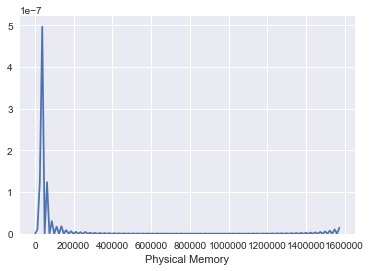

In [149]:
sns.set()
sns.distplot(temp, axlabel="Physical Memory", bins=4, hist=False)

/home/pratikv/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


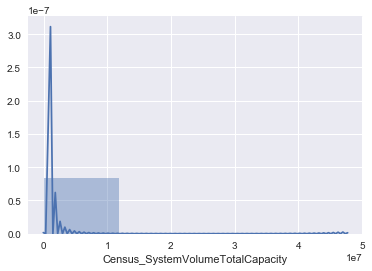

In [154]:
temp = train.Census_SystemVolumeTotalCapacity.values
temp = temp[~ np.isnan(temp)]
sns.distplot(temp, axlabel="Census_SystemVolumeTotalCapacity", bins=4)

/home/pratikv/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


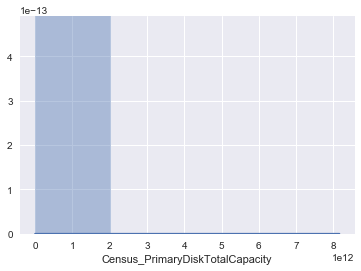

In [167]:
temp = train.Census_PrimaryDiskTotalCapacity.values
temp = temp[~ np.isnan(temp)]
sns.distplot(temp, axlabel="Census_PrimaryDiskTotalCapacity", bins=4)

### Let's convert the categorical using label encoder!!

First selecting all the columns with a categorical data type!!

#### Later let's split our data set into train, test and validation set.
We will keep the ratio - 70% (train) 10% (validation) 20% (test)

In [70]:
cat_vars = list(train.select_dtypes(include=['object']).columns)

In [71]:
cat_vars

['Census_PrimaryDiskTypeName', 'Census_ChassisTypeName']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for a in cat_vars:
    le = LabelEncoder()
    train[a] = le.fit_transform(train[a].astype(str))

In [ ]:
le = LabelEncoder()
train["Census_PowerPlatformRoleName"] = le.fit_transform(train["Census_PowerPlatformRoleName"].astype(str))

In [74]:
le = LabelEncoder()
train["Census_PrimaryDiskTypeName"] = le.fit_transform(train["Census_PrimaryDiskTypeName"].astype(str))
le = LabelEncoder()
train["Census_ChassisTypeName"] = le.fit_transform(train["Census_ChassisTypeName"].astype(str))

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:71], train.iloc[:,71], test_size=0.2, train_size=0.8, random_state=42)

In [49]:
train.to_csv('train_processed.csv', index=False)

### Building a basic Random Forest Model

In [80]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1, verbose=1)
m.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [81]:
m.score(X_train, y_train)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   39.1s finished


0.9851051941199235

In [83]:
m.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   10.0s finished


0.6002789894283295

In [84]:
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1, max_depth=7, verbose=1)
m.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.1min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [85]:
m.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.8s finished


0.604430764609255

In [87]:
!pip install xgboost

    100% |████████████████████████████████| 16.6MB 2.0MB/s eta 0:00:01
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import xgboost as xgb

In [92]:
clf = xgb.XGBClassifier(n_jobs=-1, max_depth=7, n_estimators=50, silent=False, colsample_bytree=0.5)
clf.fit(X_train, y_train)

[21:25:54] Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[21:26:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=7
[21:26:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=7
[21:26:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=7
[21:27:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=7
[21:27:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=7
[21:27:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=7
[21:28:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [93]:
clf.score

<bound method ClassifierMixin.score of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)>

In [101]:
import gc
gc.collect()

138

In [3]:
from sklearn.metrics import accuracy_score

In [98]:
print (accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)))

0.6282233282911982


/home/pratikv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [100]:
print (accuracy_score(y_true=y_test, y_pred=m.predict(X_test)))

0.604430764609255


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.6s finished


#### Preparing the test Set by doing the same transformations.

In [5]:
dtypes = {
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        }


In [8]:
tmp = pd.read_csv('test.csv.zip', nrows=10)
columns_all = tmp.columns.tolist()
columns_all.remove('MachineIdentifier')

In [9]:
test = pd.read_csv('test.csv.zip', usecols=columns_all, dtype=dtypes)

In [10]:
test.drop(axis=1, columns=["Census_IsWIMBootEnabled","Census_InternalBatteryType","Census_IsFlightingInternal","Census_ProcessorClass","Census_ThresholdOptIn","DefaultBrowsersIdentifier","OrganizationIdentifier","PuaMode","SmartScreen"], inplace=True)

In [11]:
print (test.shape)

(7853253, 72)


In [12]:
test.Wdft_RegionIdentifier.fillna(-10, inplace=True)
test.Wdft_IsGamer.fillna(2, inplace=True)

test.UacLuaenable.fillna(-100, inplace=True)

test.drop(columns=['SMode'], inplace=True, axis=1)

test.RtpStateBitfield.fillna(-100, inplace=True)

test["OsBuildLab"] = test.OsBuildLab.cat.add_categories('missing').fillna('missing')

test.IsProtected.fillna(2, inplace=True)

test.IeVerIdentifier.fillna(-100, inplace=True)

test.GeoNameIdentifier.fillna(-100, inplace=True)

test.Firewall.fillna(2, inplace=True)

test.Census_ProcessorCoreCount.fillna(4, inplace=True)

test.Census_ProcessorManufacturerIdentifier.fillna(-100,inplace=True)

test.Census_ProcessorModelIdentifier.fillna(-100,inplace=True)

test.CityIdentifier.fillna(-100,inplace=True)

test.Census_TotalPhysicalRAM.fillna(6115.266, inplace=True)

test.Census_SystemVolumeTotalCapacity.fillna(377368.25, inplace=True)

test["Census_PrimaryDiskTypeName"] = test.Census_PrimaryDiskTypeName.str.replace('Unspecified', 'UNKNOWN')
test.Census_PrimaryDiskTypeName.fillna("UNKNOWN", inplace=True)

test.Census_PrimaryDiskTotalCapacity.fillna(3089054.5, inplace=True)

test["Census_PowerPlatformRoleName"] = test.Census_PowerPlatformRoleName.str.replace('Unspecified', 'UNKNOWN')
test.Census_PowerPlatformRoleName.fillna("UNKNOWN", inplace=True)

test.Census_OSInstallLanguageIdentifier.fillna(-100,inplace=True)

test.Census_OEMModelIdentifier.fillna(-100,inplace=True)

test.Census_OEMNameIdentifier.fillna(-100,inplace=True)

test.Census_IsVirtualDevice.fillna(2, inplace=True)

test.Census_IsFlightsDisabled.fillna(2, inplace=True)
test.Census_IsAlwaysOnAlwaysConnectedCapable.fillna(2, inplace=True)

test.Census_FirmwareVersionIdentifier.fillna(-100,inplace=True)
test.Census_FirmwareManufacturerIdentifier.fillna(-100,inplace=True)
test.AVProductStatesIdentifier.fillna(-100,inplace=True)

test.AVProductsInstalled.fillna(-2, inplace=True)
test.AVProductsEnabled.fillna(-2, inplace=True) 

test.Census_InternalBatteryNumberOfCharges.fillna(0.0, inplace=True)

test.Census_InternalPrimaryDisplayResolutionVertical.fillna(897.5707, inplace=True)
test.Census_InternalPrimaryDiagonalDisplaySizeInInches.fillna(16.6760, inplace=True)
test.Census_InternalPrimaryDisplayResolutionHorizontal.fillna(1547.716, inplace=True)

import re
exp = re.compile('[0-9]+')

test["Census_ChassisTypeName"] = test.Census_ChassisTypeName.str.replace(exp, 'Unknown')
test["Census_ChassisTypeName"] = test.Census_ChassisTypeName.str.replace('Other', 'Unknown')
test["Census_ChassisTypeName"] = test.Census_ChassisTypeName.str.replace('UNKNOWN', 'Unknown')
test.Census_ChassisTypeName.fillna('Unknown', inplace=True)

test.CityIdentifier.fillna(-100,inplace=True)

In [13]:
test.shape

(7853253, 71)

In [14]:
cat_vars_test = list(test.select_dtypes(include=['object', 'category']).columns)
print (cat_vars_test)

['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']


In [16]:
from sklearn.preprocessing import LabelEncoder
for a in cat_vars_test:
    le = LabelEncoder()
    test[a] = le.fit_transform(test[a].astype(str))

In [17]:
display_all(test.dtypes)

NameError: name 'display_all' is not defined

In [ ]:
gc.collect()

In [128]:
preds = clf.predict(test)

MemoryError: 

In [126]:
del y_train, y_test

In [136]:
gc.collect()

189

In [134]:
%whos

Variable                 Type             Data/Info
---------------------------------------------------
LabelEncoder             type             <class 'sklearn.preproces<...>sing.label.LabelEncoder'>
RandomForestClassifier   ABCMeta          <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
a                        str              Census_FlightRing
accuracy_score           function         <function accuracy_score at 0x7f93d4163268>
cat_vars                 list             n=2
cat_vars_test            list             n=25
clf                      XGBClassifier    XGBClassifier(base_score=<...>ilent=False, subsample=1)
columns                  list             n=82
columns_all              list             n=81
display_all              function         <function display_all at 0x7f93b91ed598>
dtypes                   dict             n=81
exp                      SRE_Pattern      re.compile('[0-9]+')
gc                       module           <module 'gc' (built-in)>
le       

In [135]:
del temp, tmp, meta_data

In [138]:
!pip install joblib

    100% |████████████████████████████████| 286kB 816kB/s ta 0:00:011
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
import joblib

In [140]:
joblib.dump(clf, 'xgb_model.dat')
del clf

In [19]:
#load saved model
clf1 = joblib.load('xgb_model.dat')

In [20]:
preds = clf1.predict(test)

/home/pratikv/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
preds

array([1, 1, 0, ..., 0, 1, 0], dtype=int8)

In [23]:
mc = pd.read_csv('test.csv.zip', usecols=['MachineIdentifier'])

In [25]:
mc["HasDetections"] = preds

In [30]:
mc.to_csv('submission1.csv', compression='gzip',index=False)

In [29]:
mc.shape

(7853253, 2)

In [31]:
test.to_csv('test_processed.csv', compression='gzip',index=False)

In [32]:
test.dtypes

ProductName                                            int64
EngineVersion                                          int64
AppVersion                                             int64
AvSigVersion                                           int64
IsBeta                                                  int8
RtpStateBitfield                                     float16
IsSxsPassiveMode                                        int8
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float16
AVProductsEnabled                                    float16
HasTpm                                                  int8
CountryIdentifier                                      int16
CityIdentifier                                       float32
GeoNameIdentifier                                    float16
LocaleEnglishNameIdentifier                             int8
Platform                                               int64
Processor               